# Clustering Jerárquico

## Introducción

Vimos anteriormente que una de las desventajas de utilizar K-Means es que uno debe definir a priori el número k (número de clusters) los algoritmos de clustering jerárquico no sólo no requieren determinar el número de clusters a priori, sino que ofrecen una visualización de los clusters en forma de arbol que resulta enriquesedora. 

Veremos aquí algoritmos de clustering jerárquico aglomerativos (bottom up) en los cuales se comienza por la resolución más fina, en la cual cada punto es un cluster, de modo que hay N clusters de tamaño 1, y se procede a fusionar los pares de clusters más cercanos iterativamente hasta tener un solo cluster de tamaño N.

Este proceso se esquematiza en la siguiente figura:

<img src='hierarchical_clust.png' width=90%>

La visualización del dendograma muchas veces permite ver cuántos clusters hay en los datos, aún cuando los mismos vivan en un espacio de alta dimensionalidad.

Además de ser necesario definir una medida de distancia, al igual que con k-means, ahora debemos definir un criterio mediante el cual fusionaremos los clusters. A este criterio se lo llama "linkage" y algunas maneras de definirlo son las siguientes:

* Single: Calcula todos los pares de distancias entre los miembros del cluster A y B y utiliza la minima.

* Completo: Calcula todos los pares de distancias entre los miembros del cluster A y el cluster B y utiliza la máxima.

* Media: Calcula todos los pares de distancias entre los miembros del cluster A y el cluster B y utiliza un promedio de todas.

* Ward: Calcula la diferencia en la varianza total generada al aglomerar los diferentes clusters y busca la minima.

Algunas cosas más:


* <b>Ward</b> es la opción por default. Tiende a generar clusters de dimensiones similares y funciona bien en la mayoría de los casos prácticos.

* Si tenemos clusters con diferentes cantidades de miembros, <b>completo</b> y <b> media </b> son buenas opciones.

* <b>Single linkage</b> tiende a generar clusters extendidos en los que las hojas se van agregando de a una.


### Ejemplo

Trabajaremos nuevamente con el dataset "mall_customers.csv" de la Clase 6.

In [46]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist
import numpy as np

In [47]:
df=pd.read_csv('..\..\Clase 6\Clustering\mall_customers.csv')
df.rename({'Annual Income (k$)':'Income','Spending Score (1-100)':'Spending Score'},axis=1,inplace=True)
df.head(5)

,CustomerID,Gender,Age,Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Al igual que en kmeans, el algoritmo depende de una medida de distancia entre los datos en el espacio de las features. Por este motivo es necesario llevarlas a la misma escala.

In [48]:
X=df[['Income','Spending Score']];

scaler=StandardScaler();

X_sc=scaler.fit_transform(X);

Para implementar el modelo de clustering jerárquico no usaremos la librería scikit-learn sino funciones de la librería scipy, de modo que la sintaxis no involucrará los métodos "fit" y "predict" clásicos de sklearn. Concretamente aplicaremos la función **linkage** a nuestros datos y luego graficaremos los resultados con la función **dendrogram**. Hagámoslo y luego comentamos estas funciones.

In [50]:
Z = linkage(X_sc, 'ward');

plt.figure(figsize=[7,7])
plt.title('Dendrogram')
plt.xlabel('Index Numbers')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90.,  
    leaf_font_size=5.,  
    color_threshold=0,
    truncate_mode='lastp'
)
plt.show()

#### La función linkage

La función linkage devuelva una matriz **Z** de (n-1) filas y 4 columnas. En la iteración i-ésima, los clusters con índices **Z[i, 0]** y **Z[i, 1]** se combinan para formar el cluster **n + i**. Un cluster con un índice menor a **n** corresponde a una de las **n** observaciones originales. La distancia entre los clusters **Z[i, 0]** and **Z[i, 1]** la encontramos en **Z[i, 2]**. El cuarto valor **Z[i, 3]** representa el número de observaciones en el cluster que es está formando.

#### El dendrograma

Mirando el dendrograma, ¿cuántos clusters se ven en los datos?

Para identificar clusters en el dendrograma debemos definir una distancia de corte en el eje vertical, de manera que nos queden ramas independientes del arbol, cada una de las cuales será un cluster. Y la distancia entre todos los pares de clusters formados será mayor que la distancia de corte. Por ejemplo si cortáramos el arbol a una altura del eje y=6, quedaría así:


In [24]:
list(sns.color_palette('hls'))

[(0.86, 0.3712, 0.33999999999999997),
 (0.8287999999999999, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.3712),
 (0.33999999999999997, 0.8287999999999999, 0.86),
 (0.3712, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.8287999999999999)]

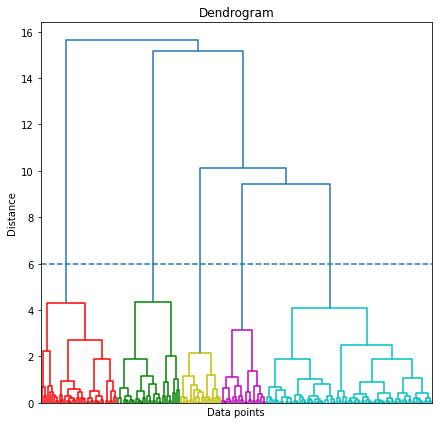

In [25]:
from scipy.cluster import hierarchy 

plt.figure(figsize=[7,7])
plt.title('Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Distance')

color_palette=['r','g','y','m','c'];

hierarchy.set_link_color_palette(color_palette) 

dendrogram(
    Z,
    leaf_rotation=90.,  
    leaf_font_size=5.,  
    color_threshold=6,     
)
plt.hlines(6,0,2000,linestyle='--')
plt.xticks([])
plt.show()



De esta manera quedan definidos 5 clusters, cada uno de los cuales tiene un "diámetro" característico cercano a 4, y que la distancia mínima entre ellos es cercana a 10. Por este motivo esta elección de número de clusters parece adecuada.

Para ver la composición exacta de cada cluster usamos la función fcluster, pasando como argumento la distancia de corte o directamente el número de clusters



Cluster labels:
 [4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 5 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 1 5 1 5 1 2 1 2 1 5 1 2 1 2 1 2 1 2 1 5 1 2 1 5 1
 2 1 2 1 2 1 2 1 2 1 2 1 5 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


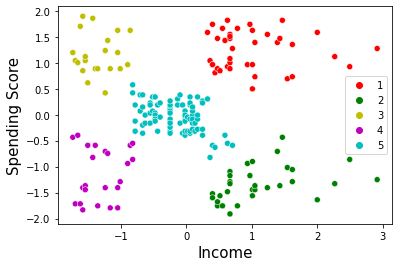

In [26]:
labels=fcluster(Z,5,criterion='maxclust');

print('Cluster labels:\n',labels)

sns.scatterplot(x=X_sc[:,0],y=X_sc[:,1],hue=labels,legend='full',palette=color_palette);
plt.xlabel('Income',fontsize=15);plt.ylabel('Spending Score',fontsize=15);

### Coeficiente Cofenético

Este coeficiente pretende medir la calidad del clustering jerárquico a través de la correlación lineal entre las distancias originales de cada par de puntos y las distancias de los clusters que los contenían al momento de unirse:

$$
c=\frac{\sum_{i<j} (x(i,j)-\bar{x})(t_{i,j}-\bar{t})}
{\sqrt{\sum_{i<j} (x(i,j)-\bar{x})^2 \sum_{i<j} (t(i,j)-\bar{t})^2}}
$$

en donde $x(i,j)$ es la distancia entre los puntos i-j y $t(i,j)$ es la distancia entre los clusters que contenían al punto i y al punto j al momento de unirse.

Uno esperaría que este coeficiente fuera cercano a uno, de modo que las dos distancias estén muy correlacionadas.

En nuestro ejemplo:

In [27]:
c,dists=cophenet(Z, pdist(X_sc))
print('Cophenetic coefficient:',c)

Cophenetic coefficient: 0.7209128193077099


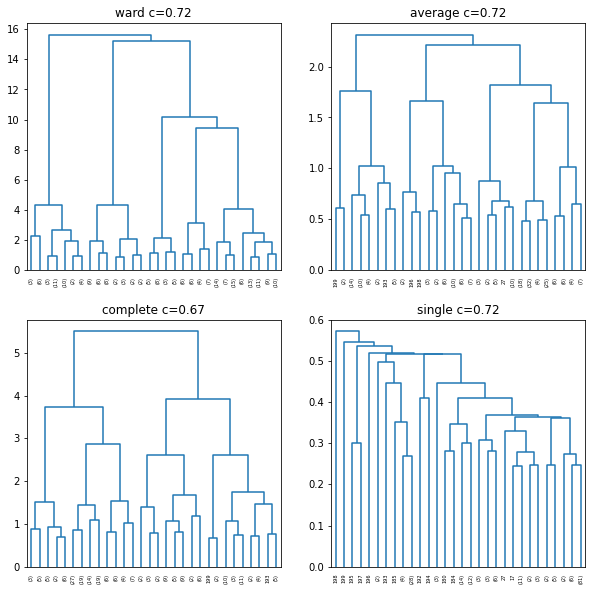

In [28]:
def plot_dendrogram(X_sc,method,ax):
    Z = linkage(X_sc, method);
    c,dists=cophenet(Z, pdist(X_sc));
    ax.set_title(method+' c='+str(np.around(c,2)))        
    ax.set_xticklabels([])
    dendrogram(
        Z,
        leaf_rotation=90.,  
        leaf_font_size=5.,  
        color_threshold=0,
        truncate_mode='lastp',
        ax=ax
    )        
    return  



fig,axes=plt.subplots(2,2,figsize=(10,10))

plot_dendrogram(X_sc,'ward',axes[0,0])
plot_dendrogram(X_sc,'average',axes[0,1])
plot_dendrogram(X_sc,'complete',axes[1,0])
plot_dendrogram(X_sc,'single',axes[1,1])
plt.show()

Sigamos una una la discusión dada en el siguiente link sobre clustering jerárquico [CJ](https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/#Selecting-a-Distance-Cut-Off-aka-Determining-the-Number-of-Clusters)

# Tutorial

(150, 2)


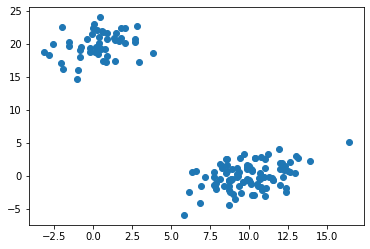

In [29]:
# generate two clusters: a with 100 points, b with 50:
np.random.seed(4711)  # for repeatability of this tutorial
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
X = np.concatenate((a, b),)
print(X.shape)  # 150 samples with 2 dimensions
plt.scatter(X[:,0], X[:,1])
plt.show()

## Realizar la agrupación jerárquica

In [30]:
# generate the linkage matrix
Z = linkage(X, 'ward')

In [31]:
c, coph_dists = cophenet(Z, pdist(X))
c

0.9800148387574268

Independientemente del método y la métrica que elija, la función linkage() utilizará ese método y esa métrica para calcular las distancias de los clusters (comenzando con sus n muestras individuales (aka puntos de datos) como clusters únicos)) y en cada iteración fusionará los dos clusters que tengan la menor distancia según el método y la métrica seleccionados. Devolverá un array de longitud n - 1 que le dará información sobre las n - 1 fusiones de clusters que necesita para fusionar por pares n clusters. Z[i] nos dirá qué clusters se han fusionado en la i-ésima iteración, veamos los dos primeros puntos que se han fusionado:

In [32]:
Z[0]

array([5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00])


Podemos ver que cada fila de la matriz resultante tiene el formato [idx1, idx2, dist, sample_count].

En su primera iteración, el algoritmo de enlace decidió fusionar los dos clusters (muestras originales aquí) con los índices 52 y 53, ya que sólo tenían una distancia de 0,04151. Esto creó un cluster con un total de 2 muestras.

In [33]:
Z[1]

array([1.40000000e+01, 7.90000000e+01, 5.91375926e-02, 2.00000000e+00])

En la segunda iteración, el algoritmo decidió fusionar los clusters (muestras originales aquí también) con los índices 14 y 79, que tenían una distancia de 0,04914. Así se formó de nuevo otro cluster con un total de 2 muestras.

Los índices de los clusters hasta ahora corresponden a nuestras muestras. Recordemos que teníamos un total de 150 muestras, por lo que los índices 0 a 149. Veamos las primeras 20 iteraciones:

In [34]:
Z[:20]

array([[5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00],
       [1.40000000e+01, 7.90000000e+01, 5.91375926e-02, 2.00000000e+00],
       [3.30000000e+01, 6.80000000e+01, 7.10677929e-02, 2.00000000e+00],
       [1.70000000e+01, 7.30000000e+01, 7.13712071e-02, 2.00000000e+00],
       [1.00000000e+00, 8.00000000e+00, 7.54313099e-02, 2.00000000e+00],
       [8.50000000e+01, 9.50000000e+01, 1.09277896e-01, 2.00000000e+00],
       [1.08000000e+02, 1.31000000e+02, 1.10071548e-01, 2.00000000e+00],
       [9.00000000e+00, 6.60000000e+01, 1.13022407e-01, 2.00000000e+00],
       [1.50000000e+01, 6.90000000e+01, 1.14289714e-01, 2.00000000e+00],
       [6.30000000e+01, 9.80000000e+01, 1.21200766e-01, 2.00000000e+00],
       [1.07000000e+02, 1.15000000e+02, 1.21671017e-01, 2.00000000e+00],
       [6.50000000e+01, 7.40000000e+01, 1.24900190e-01, 2.00000000e+00],
       [5.80000000e+01, 6.10000000e+01, 1.40277358e-01, 2.00000000e+00],
       [6.20000000e+01, 1.52000000e+02, 1.72599535e

Podemos observar que hasta la iteración 13 el algoritmo sólo fusionó directamente las muestras originales. También podemos observar el aumento monotónico de la distancia.

En la iteración 14 el algoritmo decidió fusionar los índices del cluster 62 con el 152. Si ha prestado atención, el 152 debería sorprenderle, ya que sólo tenemos los índices de muestras originales 0 a 149 para nuestras 150 muestras. Todos los índices idx >= len(X) se refieren en realidad al cluster formado en Z[idx - len(X)].

Esto significa que mientras el idx 149 corresponde a X[149] el idx 150 corresponde al cluster formado en Z[0], el idx 151 a Z[1], el 152 a Z[2], ...

Por lo tanto, la iteración de fusión 14 fusionó la muestra 62 a nuestras muestras 33 y 68 que se fusionaron previamente en la iteración 3 correspondiente a Z[2] (152 - 150).

Comprobemos las coordenadas de los puntos para ver si esto tiene sentido:

In [35]:
X[[33, 68, 62]]

array([[ 9.83913054, -0.48729797],
       [ 9.8934927 , -0.44152257],
       [ 9.97792822, -0.56383202]])

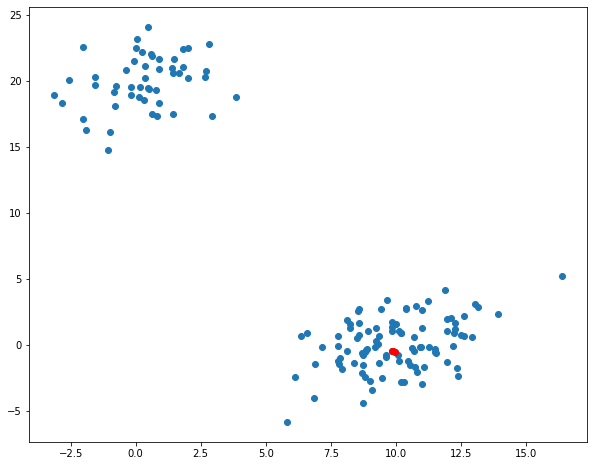

In [36]:
idxs = [33, 68, 62]
plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1])  # plot all points
plt.scatter(X[idxs,0], X[idxs,1], c='r')  # plot interesting points in red again
plt.show()

Podemos ver que los 3 puntos rojos están bastante cerca unos de otros, lo cual es bueno.

Lo mismo ocurrió en la iteración 15, en la que el alrogitmo fusionó los índices 41 a 15 y 69:

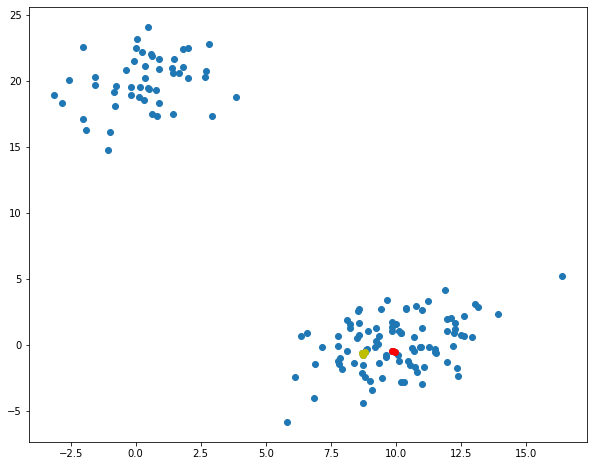

In [37]:
idxs = [33, 68, 62]
plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1])
plt.scatter(X[idxs,0], X[idxs,1], c='r')
idxs = [15, 69, 41]
plt.scatter(X[idxs,0], X[idxs,1], c='y')
plt.show()

Mostrando que los 3 puntos amarillos también están bastante cerca.

Y así sucesivamente...

Más tarde volveremos a visualizar esto, pero ahora vamos a echar un vistazo a lo que se llama un dendrograma de esta agrupación jerárquica:

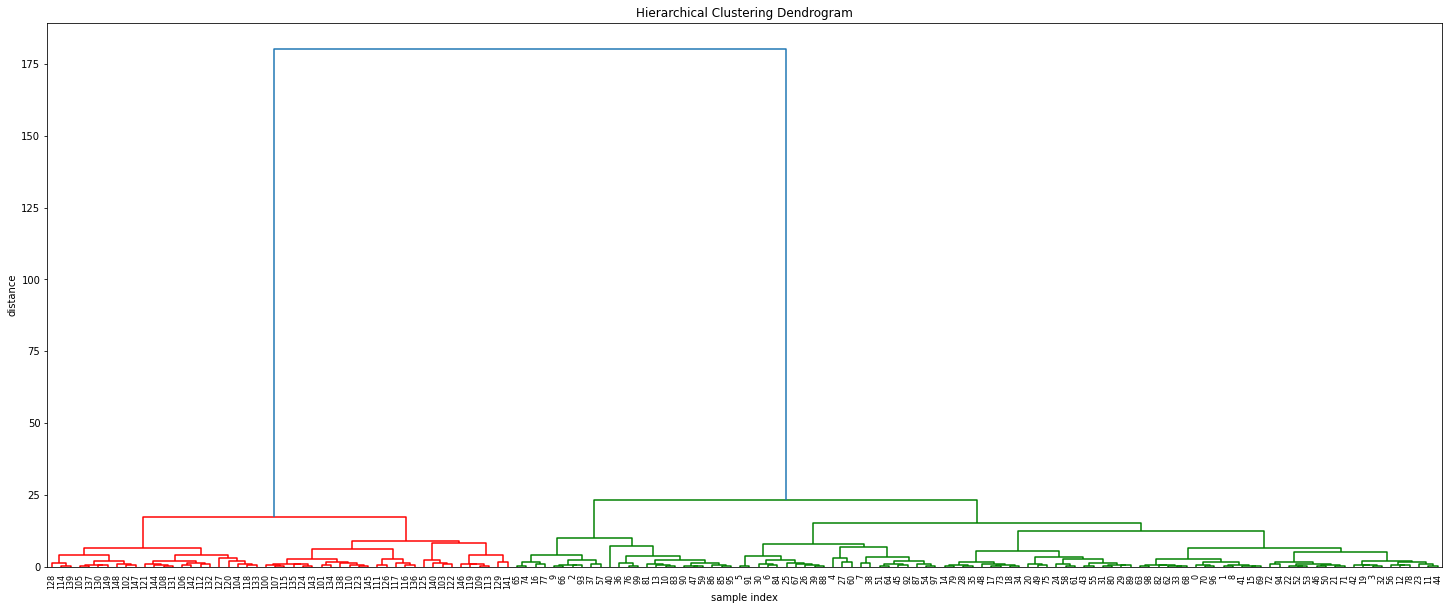

In [38]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

Si es la primera vez que ves un dendrograma, probablemente sea bastante confuso, así que vamos a desmontarlo...

En el eje x se ven las etiquetas. Si no especifica nada más, son los índices de sus muestras en X.
En el eje Y ves las distancias (del método 'ward' en nuestro caso).
A partir de cada etiqueta en la parte inferior, puedes ver una línea vertical hasta una línea horizontal. La altura de esa línea horizontal le indica la distancia a la que esta etiqueta se fusionó con otra etiqueta o clúster. Puede encontrar ese otro clúster siguiendo de nuevo la otra línea vertical hacia abajo. Si no encuentra otra línea horizontal, se acaba de fusionar con la otra etiqueta a la que llega, de lo contrario se fusionó con otro clúster que se formó anteriormente.

Resumiendo:

las líneas horizontales son fusiones de clusters
las líneas verticales le indican qué clústeres/etiquetas formaron parte de la fusión que formó ese nuevo clúster
las alturas de las líneas horizontales le indican la distancia que se ha tenido que "salvar" para formar el nuevo clúster
También puede ver que a partir de distancias > 25 hay un gran salto de la distancia hasta la fusión final a una distancia de aproximadamente 180. Veamos las distancias de las últimas 4 fusiones:

In [39]:
Z[-4:,2]

array([ 15.11533118,  17.11527362,  23.12198936, 180.27043021])

Tales saltos de distancia / huecos en el dendrograma son bastante interesantes para nosotros. Indican que aquí se ha fusionado algo que quizá no debería estar fusionado. En otras palabras: tal vez las cosas que se fusionaron aquí realmente no pertenecen al mismo clúster, lo que nos indica que tal vez sólo hay 2 clústeres aquí.

Si miramos los índices en el dendrograma anterior también vemos que el cluster verde sólo tiene índices >= 100, mientras que el rojo sólo tiene tales < 100. Esto es algo bueno, ya que muestra que el algoritmo redescubrió las dos clases en nuestro ejemplo de juguete.

En caso de que se pregunte de dónde provienen los colores, puede que quiera echar un vistazo al argumento color_threshold de dendrogram(), que como no se especificó, escogió automáticamente un valor de corte de distancia del 70 % de la fusión final y luego coloreó los primeros clusters por debajo de eso en colores individuales.

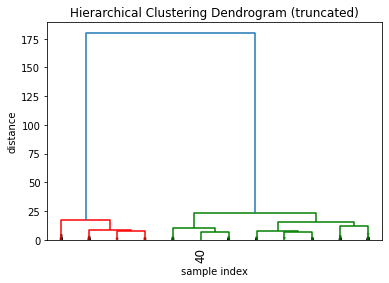

In [40]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

Lo anterior muestra un dendrograma truncado, que sólo muestra el último p=12 de nuestras 149 fusiones.

Lo primero que hay que notar es que faltan la mayoría de las etiquetas. Esto se debe a que, a excepción de X[40], todas las demás muestras ya estaban fusionadas en clusters antes de las últimas 12 fusiones.

El parámetro show_contracted nos permite dibujar puntos negros en las alturas de esas fusiones de clusters anteriores, de modo que podemos seguir detectando los huecos aunque no queramos saturar toda la visualización. En nuestro ejemplo podemos ver que los puntos están todos a distancias bastante pequeñas cuando se comparan con la enorme última fusión a una distancia de 180, lo que nos dice que probablemente no nos perdimos mucho allí.

Como es un poco difícil hacer un seguimiento de los tamaños de los clusters sólo por los puntos, dendrogram() también imprimirá por defecto los tamaños de los clusters entre paréntesis () si un cluster fue truncado:

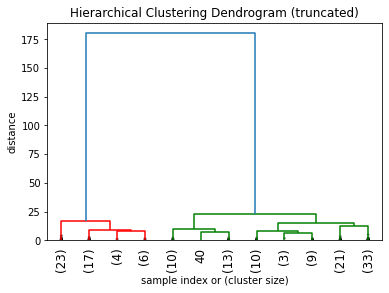

In [41]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [42]:
# set cut-off to 50
max_d = 50  # max_d as in max_distance

In [43]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

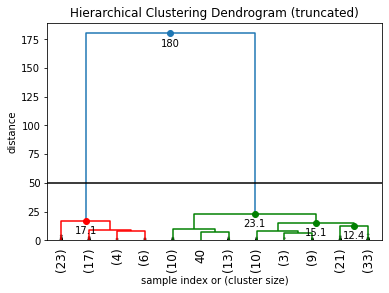

In [44]:
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
    max_d=max_d,  # plot a horizontal cut-off line
)
plt.show()

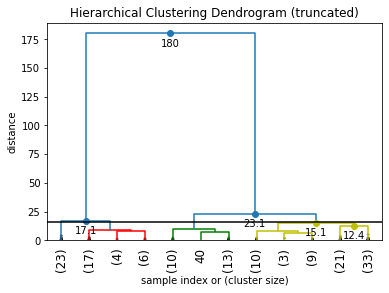

In [45]:
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
    max_d=16,
)
plt.show()

#### 